# Fordgobike Data Exploration
## by Meng Tan

## Preliminary Wrangling

This document explores a dataset containing the whole year (2019) information about approximately 2,506,983 individual rides made in a bike-sharing system in the greater San Francisco Bay area.

In [2]:
# import all packages and set plots to be embedded inline
import requests
import zipfile
import io
import os
import glob
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Gathering From Website
The data provided by Udacity course is a single month data, I decide to find a whole year data from [LWFT Website](https://www.lyft.com/bikes/bay-wheels) since I'm interested in exploring a longer time period data. 

This is a direct url to [Data Source](https://s3.amazonaws.com/baywheels-data/index.html).

*Note: since the whole year data turns out to be a 353.5MB file, it will take some time to download, combine, and save data. Without suffering from this process, please feel free to jump to <a href="#clean">Assessing And Cleaning Data</a> part.*

In [2]:
# Make directory if it doesn't already exist
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
baywheels_urls = ['https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip']

In [6]:
# Download data from above urls
for url in baywheels_urls:
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(folder_name)

In [7]:
files = [f for f in glob.glob('data/*.csv')]
print(files)

['data/201909-baywheels-tripdata.csv', 'data/201904-fordgobike-tripdata.csv', 'data/201907-baywheels-tripdata.csv', 'data/201903-fordgobike-tripdata.csv', 'data/201906-baywheels-tripdata.csv', 'data/201908-baywheels-tripdata.csv', 'data/201905-baywheels-tripdata.csv', 'data/201901-fordgobike-tripdata.csv', 'data/201910-baywheels-tripdata.csv', 'data/201912-baywheels-tripdata.csv', 'data/201911-baywheels-tripdata.csv', 'data/201902-fordgobike-tripdata.csv']


In [8]:
# Check if all files have same columns
listname = []
for f in files:
    listname = listname + list(pd.read_csv(f).columns)

pd.Series(listname).value_counts()

/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


start_station_latitude     12
start_station_id           12
end_time                   12
end_station_name           12
bike_id                    12
end_station_longitude      12
start_station_name         12
end_station_id             12
end_station_latitude       12
start_time                 12
user_type                  12
duration_sec               12
start_station_longitude    12
bike_share_for_all_trip    11
rental_access_method        4
dtype: int64

In order to combine the whole year data, I decide to remove columns `bike_share_for_all_trip` and `rental_access_method`.

In [9]:
common_cols = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 
               'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name',
               'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type']

In [10]:
bike_whole = pd.concat([pd.read_csv(f)[common_cols] for f in files])

/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/meng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [11]:
bike_whole.to_pickle('fordgobike_2019.pkl')

<a id='clean'></a>
### Assessing And Cleaning Data

In [2]:
bike = pd.read_pickle('fordgobike_2019.pkl')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber


In [3]:
bike.shape

(2506983, 13)

In [4]:
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

In [5]:
bike.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           80734
start_station_name         80133
start_station_latitude         0
start_station_longitude        0
end_station_id             82902
end_station_name           82350
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

In [6]:
# Convert start_time, end_time into timestamp types
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

In [7]:
# Check the distribution of missing data in different months
bike.loc[bike.start_station_id.isnull()].start_time.dt.month.value_counts()

7     55887
12    21019
6      2160
11      923
1       248
3       221
2       197
4        64
5        15
Name: start_time, dtype: int64

Since the missing data distributed largely in July and December, if simply removing these data, the analysis of bike using frequency of these two months will be influenced a lot. Therefore, I decide to keep these data.

In [8]:
# Convert start_station_id, end_station_id to int types
bike.start_station_id = bike.start_station_id.astype('Int64')
bike.end_station_id = bike.end_station_id.astype('Int64')

# Convert start_station_name, end_station_name, user_type to categorical types
bike.start_station_name = bike.start_station_name.astype('category')
bike.end_station_name = bike.end_station_name.astype('category')
bike.user_type = bike.user_type.astype('category')

In [9]:
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    Int64
start_station_name               category
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      Int64
end_station_name                 category
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
dtype: object

In [10]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [11]:
bike['start_month'] = bike['start_time'].dt.month
bike['start_hour'] = bike['start_time'].dt.hour
bike['start_weekday'] = bike['start_time'].dt.weekday

In [12]:
def month_name(n):
    if n == 1:
        return 'Jan'
    elif n == 2:
        return 'Feb'
    elif n == 3:
        return 'Mar'
    elif n == 4:
        return 'Apr'
    elif n == 5:
        return 'May'
    elif n == 6:
        return 'June'
    elif n == 7:
        return 'July'
    elif n == 8:
        return 'Aug'
    elif n == 9:
        return 'Sept'
    elif n == 10:
        return 'Oct'
    elif n == 11:
        return 'Nov'
    else:
        return 'Dec'

In [13]:
bike.start_month = bike.start_month.apply(month_name)

In [14]:
month_cat = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
month_type = pd.api.types.CategoricalDtype(categories=month_cat, ordered=True)
bike.start_month = bike.start_month.astype(month_type)

In [15]:
def week_day(n):
    if n == 0:
        return 'Mon'
    elif n == 1:
        return 'Tue'
    elif n == 2:
        return 'Wed'
    elif n == 3:
        return 'Thur'
    elif n == 4:
        return 'Fri'
    elif n == 5:
        return 'Sat'
    else:
        return 'Sun'

In [16]:
bike.start_weekday = bike.start_weekday.apply(week_day)

In [17]:
weekday_cat = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
weekday_type = pd.api.types.CategoricalDtype(categories=weekday_cat, ordered=True)
bike.start_weekday = bike.start_weekday.astype(weekday_type)

In [18]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_hour,start_weekday
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,Sept,11,Mon
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,-121.876279,163,Customer,Sept,16,Mon
2,5615,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,370,Jones St at Post St,37.787327,-122.413278,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,Sept,23,Mon
3,1482,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,109,17th St at Valencia St,37.763316,-122.421904,460,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,Sept,23,Mon
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,95,Sanchez St at 15th St,37.766219,-122.431060,127,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,Sept,23,Mon


In [19]:
bike['duration_min'] = np.round(bike['duration_sec'] / 60, 0).astype('Int64')

In [20]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         Int64         
 4   start_station_name       category      
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           Int64         
 8   end_station_name         category      
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  start_month              category      
 14  start_hour               int64         
 15  start_weekday            category      
 16  duration_min             Int64         
dtypes: Int64(3), category(5), da

In [21]:
bike.to_pickle('fordgobike_2019_clean.pkl')

### What is the structure of your dataset?

There are 2,506,983 rides in the dataset with 16 features (duration_sec, duration_min, start_time, end_time, start_station_id, end_station_id, start_station_name, end_station_name, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, bike_id, user_type, start_month, start_hour, start_weekday). 

Most variables are numeric in nature, but the variables start_station_name, end_station_name, user_type, start_month, and start_weekday are category types, in which start_month and start_weekday are also ordered factor variables (in chronological month order and weekday order: from Jan to Dec, and from Mon to Sun).

### What is/are the main feature(s) of interest in your dataset?

I'm interested in figuring out what features will influence the bike demands most in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that start_time, user_type, and station address will have effects on bike demands: during rush hours, there will be more needs for bikes; subscribers may have more bike demands than casual users; the busier the physical address, the more the demands. 

In [3]:
# Load cleaned data
df = pd.read_pickle('fordgobike_2019_clean.pkl')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_hour,start_weekday,duration_min
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,Sept,11,Mon,1014
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,-121.876279,163,Customer,Sept,16,Mon,600
2,5615,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,370,Jones St at Post St,37.787327,-122.413278,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,Sept,23,Mon,94
3,1482,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,109,17th St at Valencia St,37.763316,-122.421904,460,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,Sept,23,Mon,25
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,95,Sanchez St at 15th St,37.766219,-122.431060,127,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,Sept,23,Mon,21


## Univariate Exploration

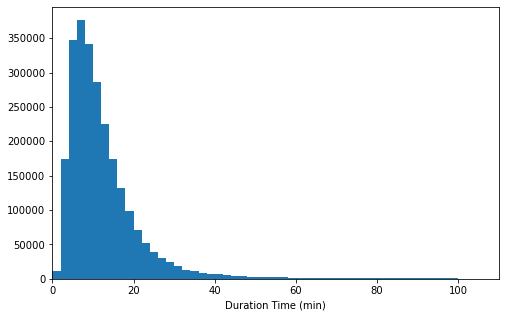

In [5]:
# Start with a standard-scale plot
binsize = 2
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xlabel('Duration Time (min)')
plt.xlim((0, 110));

Since duration time follows a right-skewed distribution, I'll use a log scale to plot instead.

In [6]:
np.log10(df.duration_min).describe()

count    2.506983e+06
mean     9.787125e-01
std      3.156961e-01
min      0.000000e+00
25%      7.781513e-01
50%      1.000000e+00
75%      1.176091e+00
max      4.181901e+00
Name: duration_min, dtype: float64

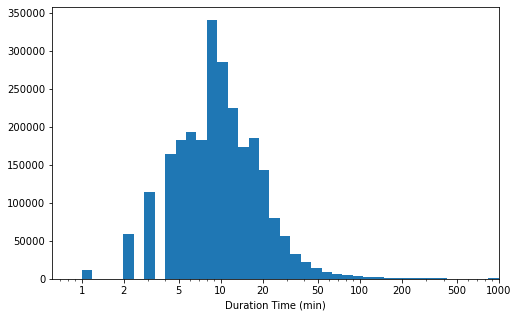

In [7]:
log_binsize = 0.075
bins = 10 ** np.arange(0, 4.18+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xscale('log')
x_ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(x_ticks, x_ticks)
plt.xlim(right=1000)
plt.xlabel('Duration Time (min)');

- Standard-scaled duration time plot has a long tail on the right, which shows that a lot of rides last a short period, and few rides last a long time. 
- Log-scale plot shows an approximately normal distribution, with a peak near 10 minutes.

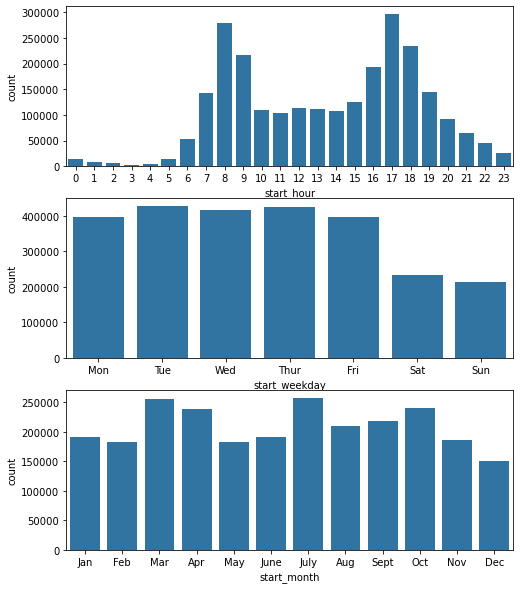

In [8]:
# Plot all three start time related variables (start_hour, start_weekday, start_month) together

fig, ax = plt.subplots(nrows=3, figsize=[8, 10])

base_color = sns.color_palette()[0]
sns.countplot(data=df, x='start_hour', color=base_color, ax=ax[0])
sns.countplot(data=df, x='start_weekday', color=base_color, ax=ax[1])
sns.countplot(data=df, x='start_month', color=base_color, ax=ax[2]);

- The distribution of start riding hour looks bimodal, with a lot of rides happened during 7 to 9 in the morning, and 4 to 7 in the afternoon, which are rush hours as expected.
- Lots of rides happened during weekdays, and few rides happened weekends. It seems that one of main purposes of using sharing bike is to go to work or study.
- July, March, and April see more rides during a year, while December sees the fewest rides. 

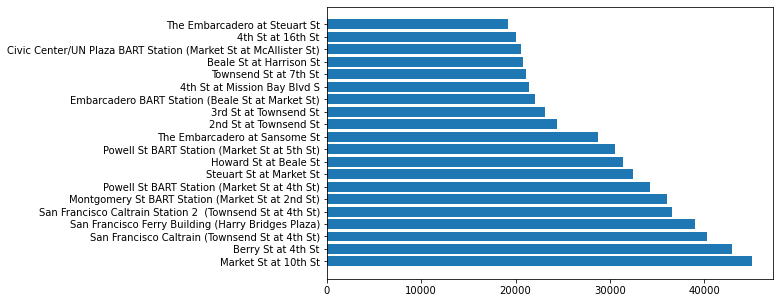

In [9]:
# Plot the top 20 busiest stations

plt.figure(figsize=[8, 5])
sorted_counts_top20 = df.start_station_name.value_counts()[:20]
plt.barh(y=sorted_counts_top20.index, width=sorted_counts_top20);

- Market St at 10th St has the most rides recorded during a year. 

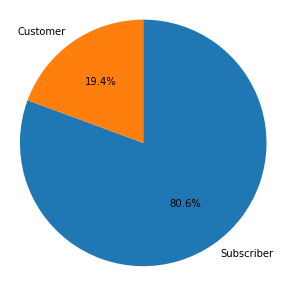

In [26]:
# Plot the user type

sorted_counts = df.user_type.value_counts()

plt.figure(figsize=[8, 5])
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('square');

Subscribers contribute 80.6% of rides.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration time has a long tail on the right, so I used log transformation to show data. With log-scaled plot, the data looked approximately normal, with one peak around 10 mintues.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Since I performed some cleaning work during the <a href="#clean">Assessing And Cleaning Data</a> part, I didn't see any unusual distributions related to my inteseted variables.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!